

---
# RDkit(with conda) will help in computation of molecular descriptors(Lipinski values, pIC50 values etc. )


In [2]:
#https://www.rdkit.org/docs/source/rdkit.Chem.Lipinski.html

! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-05-16 11:28:55--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   251MB/s    in 0.3s    

2022-05-16 11:28:55 (251 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

In [3]:
import pandas as pd
import seaborn as sns
sns.set(style='darkgrid')
import matplotlib.pyplot as plt
import math
import numpy as np 
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski


## Use Bioactivity dataset found in previous file("ACHE_bioactivity_data.csv")


In [5]:
biodata=pd.read_csv("ACHE_bioactivity_data.csv")
biodata


,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active
...,...,...,...,...
5659,CHEMBL4779440,Brc1ccc([N+]2=Cc3ccccc3CC2)cc1.[Br-],10500.0,inactive
5660,CHEMBL417799,C[n+]1cc2c3c(ccc2c2ccc4cc5c(cc4c21)OCO5)OCO3,1220.0,intermediate
5661,CHEMBL13045,COc1ccc2c(c[n+](C)c3c4cc5c(cc4ccc23)OCO5)c1OC,1450.0,intermediate
5662,CHEMBL3085398,C=CC(C)(C)c1cc([C@@H]2CC(=O)c3c(O)cc(O)c(CC=C(...,28980.0,inactive


In [6]:
#We have cleaned the canonical data. We identified the discrete structures in the bioactivity data and selected the structures which 
# have the maximum possiblity of contributing towards the bioactivity for acetylcholinesterase

smile_array=[]
biodata_no_smiles=biodata.drop(columns="canonical_smiles")

def findmaxlengthstring(a):
 max="" 
 for i in range(len(a)):
   if(len(a[i])>len(max)): 
     max=a[i]
 return max    


def refine(smile_array, biodata_no_smiles):
 canonical_list=biodata.canonical_smiles.tolist()

 for i in range(len(canonical_list)):
   temp = str(canonical_list[i]).split(".")
   Besttemp = findmaxlengthstring(temp)
   smile_array.append(Besttemp)


 smile_array = pd.Series(smile_array, name = 'canonical_smiles')
 
 biodata_clean_smiles = pd.concat([biodata_no_smiles,smile_array], axis=1)
 return biodata_clean_smiles

biodata_clean_smiles=refine(smile_array,biodata_no_smiles)
biodata_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL133897,750.0,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1
1,CHEMBL336398,100.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1
2,CHEMBL131588,50000.0,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1
3,CHEMBL130628,300.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F
4,CHEMBL130478,800.0,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C
...,...,...,...,...
5659,CHEMBL4779440,10500.0,inactive,Brc1ccc([N+]2=Cc3ccccc3CC2)cc1
5660,CHEMBL417799,1220.0,intermediate,C[n+]1cc2c3c(ccc2c2ccc4cc5c(cc4c21)OCO5)OCO3
5661,CHEMBL13045,1450.0,intermediate,COc1ccc2c(c[n+](C)c3c4cc5c(cc4ccc23)OCO5)c1OC
5662,CHEMBL3085398,28980.0,inactive,C=CC(C)(C)c1cc([C@@H]2CC(=O)c3c(O)cc(O)c(CC=C(...


## **Lipinski descriptor Analysis**
Lipinski's rule of five tells us about the **druglikeness** of the compounds of the bioactivity dataset. 

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

### **Calculate descriptors**

In [7]:
#Function was referred from: 
# https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) #reading molecular data using predefined methods in RDkit
        moldata.append(mol)
       
    baseData= np.arange(1,1) #array of evenly spaced values
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol) 
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])  #builds a vertical downward progressing stack
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [8]:
biodata_lipinski = lipinski(biodata_clean_smiles.canonical_smiles)
biodata_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,312.325,2.8032,0.0,6.0
1,376.913,4.5546,0.0,5.0
2,426.851,5.3574,0.0,5.0
3,404.845,4.7069,0.0,5.0
4,346.334,3.0953,0.0,6.0
...,...,...,...,...
5659,287.180,3.7683,0.0,0.0
5660,332.335,3.4281,0.0,4.0
5661,348.378,3.7166,0.0,4.0
5662,424.493,5.1878,4.0,6.0


In [9]:

biodata_culminated = pd.concat([biodata_clean_smiles,biodata_lipinski], axis=1)
print("Now of rows: ",len(biodata_culminated.axes[0]))
print("Now of columns: ",len(biodata_culminated.axes[1]))
biodata_culminated

Now of rows:  5664
Now of columns:  8


,molecule_chembl_id,standard_value,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL133897,750.0,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,312.325,2.8032,0.0,6.0
1,CHEMBL336398,100.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,376.913,4.5546,0.0,5.0
2,CHEMBL131588,50000.0,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,426.851,5.3574,0.0,5.0
3,CHEMBL130628,300.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,404.845,4.7069,0.0,5.0
4,CHEMBL130478,800.0,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,346.334,3.0953,0.0,6.0
...,...,...,...,...,...,...,...,...
5659,CHEMBL4779440,10500.0,inactive,Brc1ccc([N+]2=Cc3ccccc3CC2)cc1,287.180,3.7683,0.0,0.0
5660,CHEMBL417799,1220.0,intermediate,C[n+]1cc2c3c(ccc2c2ccc4cc5c(cc4c21)OCO5)OCO3,332.335,3.4281,0.0,4.0
5661,CHEMBL13045,1450.0,intermediate,COc1ccc2c(c[n+](C)c3c4cc5c(cc4ccc23)OCO5)c1OC,348.378,3.7166,0.0,4.0
5662,CHEMBL3085398,28980.0,inactive,C=CC(C)(C)c1cc([C@@H]2CC(=O)c3c(O)cc(O)c(CC=C(...,424.493,5.1878,4.0,6.0


 **Convert IC50(standard_value) to pIC50**
Due to high variance amongst the IC50 values, we work with pIC50 values to measure the druglikeness of our bioactivity data. 
This negative logarithmic transformation will also introduce a symmetric scale for our data

In [10]:


#for setting upper cap for the standard values (standard_value<=10^9), otherwise pIC50 would turn out to be negative

    
def setpIC50(dfr):
    rows=len(dfr.axes[0])
    pIC50 = []

    for i in dfr["standard_value"]:
        if i>10**8: #normalisation 
          i=10**8
        molar = i*(10**-9) # Converts nM to M
        if molar>0: 
         ele=-np.log10(molar)
        else: 
         ele=1  #base value
        pIC50.append(ele)
        
    
    
    pIC50 = pd.Series(pIC50, name = 'pIC50') #column of a dataframe(representation)
    dfr_new = pd.concat([dfr,pIC50], axis=1)
    #dfr_new=dfr_new.drop("pIC50 ok",axis=1)
    #print
    return dfr_new
    

In [11]:
biodata_norm = setpIC50(biodata_culminated)
biodata_norm

,molecule_chembl_id,standard_value,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,750.0,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,100.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,50000.0,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,300.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,800.0,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...,...
5659,CHEMBL4779440,10500.0,inactive,Brc1ccc([N+]2=Cc3ccccc3CC2)cc1,287.180,3.7683,0.0,0.0,4.978811
5660,CHEMBL417799,1220.0,intermediate,C[n+]1cc2c3c(ccc2c2ccc4cc5c(cc4c21)OCO5)OCO3,332.335,3.4281,0.0,4.0,5.913640
5661,CHEMBL13045,1450.0,intermediate,COc1ccc2c(c[n+](C)c3c4cc5c(cc4ccc23)OCO5)c1OC,348.378,3.7166,0.0,4.0,5.838632
5662,CHEMBL3085398,28980.0,inactive,C=CC(C)(C)c1cc([C@@H]2CC(=O)c3c(O)cc(O)c(CC=C(...,424.493,5.1878,4.0,6.0,4.537902


Let's write this to CSV file.

In [39]:
biodata_norm.to_csv('acetylcholinesterase_A_bioactivity_data_3class_pIC50.csv')

Now, we will only compare active and inactive values from our data set.

In [12]:
biodata_culminated_two_cat = biodata_norm[biodata_norm['class'] != 'intermediate']
biodata_culminated_two_cat

,molecule_chembl_id,standard_value,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,750.0,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,100.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,50000.0,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,300.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,800.0,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...,...
5650,CHEMBL3986315,10000.0,inactive,COc1ccccc1[N+]1=Cc2c(cccc2OC)CC1,268.336,3.0230,0.0,2.0,5.000000
5655,CHEMBL3953893,10000.0,inactive,COc1cccc2c1C=[N+](c1cc(Cl)cc(Cl)c1)CC2,307.200,4.3212,0.0,1.0,5.000000
5659,CHEMBL4779440,10500.0,inactive,Brc1ccc([N+]2=Cc3ccccc3CC2)cc1,287.180,3.7683,0.0,0.0,4.978811
5662,CHEMBL3085398,28980.0,inactive,C=CC(C)(C)c1cc([C@@H]2CC(=O)c3c(O)cc(O)c(CC=C(...,424.493,5.1878,4.0,6.0,4.537902


In [41]:
biodata_culminated_two_cat.to_csv('acetylcholinesterase_B_bioactivity_data_2class_pIC50.csv')

---

## Graphical Analysis of statistical data


Frequency comparison of Active and Non Active compounds


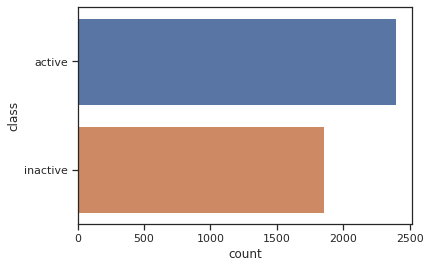

In [24]:

ax = sns.countplot(y="class", data=biodata_culminated_two_cat)



#### **pIC50 value**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'pIC50 value')

<Figure size 432x288 with 0 Axes>

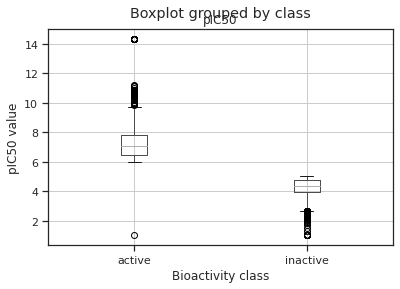

In [15]:
plt.figure()


biodata_culminated_two_cat.boxplot(by ='class', column =['pIC50'], grid = True)
plt.xlabel('Bioactivity class')
plt.ylabel('pIC50 value')



**Statistical analysis | Mann-Whitney U Test**

In [25]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  biodata = biodata_culminated_two_cat[selection]
  active = biodata[biodata['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  biodata = biodata_culminated_two_cat[selection]
  inactive = biodata[biodata['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [26]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,1850.0,0.0,0.05,Different distribution (reject H0)


#### **MW**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'MW value')

<Figure size 432x288 with 0 Axes>

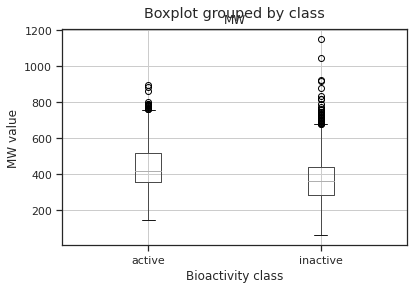

In [27]:
plt.figure()

biodata_culminated_two_cat.boxplot(by ='class', column =['MW'], grid = True)
plt.xlabel('Bioactivity class')
plt.ylabel('MW value')


In [28]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,1550035.5,4.592832e-65,0.05,Different distribution (reject H0)


#### **LogP**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'water partition coefficient')

<Figure size 432x288 with 0 Axes>

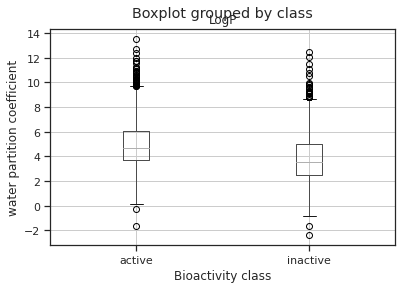

In [29]:
plt.figure()

biodata_culminated_two_cat.boxplot(by ='class', column =['LogP'], grid = True)
plt.xlabel('Bioactivity class')
plt.ylabel('water partition coefficient')



**Statistical analysis | Mann-Whitney U Test**

In [30]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,1464386.0,4.878722e-82,0.05,Different distribution (reject H0)


#### **NumHDonors**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'NumHDonors value')

<Figure size 432x288 with 0 Axes>

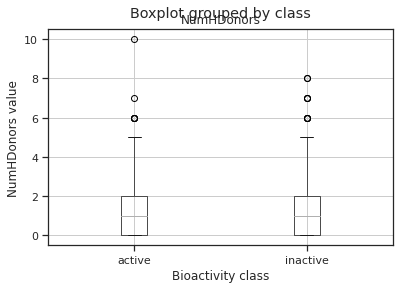

In [31]:
plt.figure()
biodata_culminated_two_cat.boxplot(by ='class', column =['NumHDonors'], grid = True)
plt.xlabel('Bioactivity class')
plt.ylabel('NumHDonors value')



**Statistical analysis | Mann-Whitney U Test**

In [32]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,1909212.5,3.871525e-17,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'NumHAcceptors value')

<Figure size 432x288 with 0 Axes>

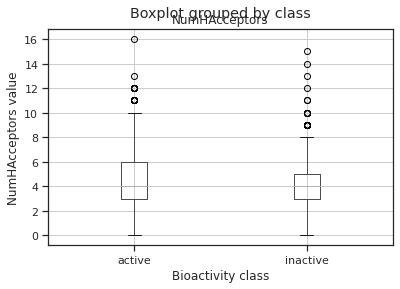

In [33]:
plt.figure()
biodata_culminated_two_cat.boxplot(by ='class', column =['NumHAcceptors'], grid = True)
plt.xlabel('Bioactivity class')
plt.ylabel('NumHAcceptors value')


In [34]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,2020224.5,8.201329e-08,0.05,Different distribution (reject H0)


Conclusion 

There is significant difference observed between active and inactive compound because of low p-value observed through mann-whitney test. 
We also observe that the Lipinski descriptors have considerable significant deviations except some cases like Hydrogen bond donnors and Hydrogen bond acceptors.  

